# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание данных:

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана
    Таблица calls (информация о звонках):
    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок
    
Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение
    Таблица internet (информация об интернет-сессиях):
    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя
    
Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    
    Тарифы:
    
    Тариф «Смарт»
    
    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
    минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
    
    Тариф «Ультра»
    
    - Ежемесячная плата: 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

Для выполнения поставленной задачи предстоит выполнить ряд действий по обработке данных и их анализу, а именно:
  
   1. Изучение общей информации 
     - Выполним ряд действий для первичного анализа данных и изучим имеющиеся у нас данные
   
   
   2. Предобработка и подготовка данных
    - Проверим данные на пропуски, постараемся разобраться в причине их появления
    - Сверим типы данных. При необходимости изменим типы данных на необходимые нам
    - Формируем таблицы и считаем количество сделанных звонков и израсходованных минут разговора по месяцам, количество      сообщений, количество интернет трафика 
    - Посчитаем помесячную выручку от каждого пользователя
    
  
  3. Проведем анализ имеющихся данных
    - Проверим данные на наличие выбросов
    - Проанализируем каждый тариф по отдельности
    - Посчитаем дисперсию и стандартное отклонение
    - Построим гистограммы для каждого тарифа
    
   
   4. Проверим несколько гипотез
    - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    
   
   5. Сделаем вывод

### Шаг 1. Изучение общей информации 

Откроем таблицы с данными и изучем их.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import statsmodels.stats.api as sms

In [3]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [4]:
df_calls.info()
df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


В столбце duration имеем некоторое количество нулевых значений. Чуть позже заменим эти значения на более подходящие. В дальнейшем нужно будет округлить минуты звонков в большую сторону согласно тарифу.

In [5]:
df_internet.info()
df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


В дальнейшем нужно будет округлить количество трафикав большую сторону согласно тарифу.

In [6]:
df_messages.info()
df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


С данними и их типами все в порядке.

In [7]:
df_tariffs.info()
df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
df_users.info()
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


По данной таблице по типам данных и количеству данных проблем нет. churn_date - такое количество значений вызвано тем, что столбец отвечает за расторжение договора на оказание услуг связи, соответсенно у нас 38 пользователей, отказашихся от тарифа.

### Вывод

Имеем 5 таблиц с данными, связанныемежду собой общими столбцами (user_id). В дальнейшем будем комбинировать таблицы необходимым нам образом менно по этому столбцу. Далее необходимо будет провести некоторые манипуляции с нулевыми значениями в столбце duration таблицы df_calls, но об этом чуть позже.

### Шаг 2. Предобработка и подготовка данных .

In [9]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

Изменим тип данных в столбцах с датами для всех таблиц. Тепеть тип данных datetime64[ns]

In [10]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Проверим на наличие дубликатов

In [11]:
df_calls.duplicated().sum()

0

In [12]:
df_internet.duplicated().sum()

0

In [13]:
df_messages.duplicated().sum()

0

In [14]:
df_users.duplicated().sum()

0

Изучим столбец duration. Имеем очень большое количество нулевых значений. 

In [15]:
df_calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Заменим нулевые значения на медиану.

In [16]:
df_calls['duration'] = df_calls['duration'].replace(0, df_calls['duration'].median())

In [17]:
df_calls['duration'].value_counts()

6.00     39729
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.33        1
25.67        1
27.19        1
28.87        1
27.63        1
Name: duration, Length: 2870, dtype: int64

Нулевые значения отсутствуют. Можно проболжать наше исследование.

Округлим значения потраченных минут до целых в большую сторону. Это необходимо сделать исходя из условий тарифа.

In [18]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,6.0,1000
1,1000_1,2018-08-17,6.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


Создадим табличку df_users_tariff. она нам понадобится для присоединения к уже имеющимся таблицам.

In [19]:
df_users_tariff = df_users[['user_id', 'city', 'tariff']]
df_users_tariff

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


Добавим столбец с месяцем к таблице df_calls. Это необходимо для подсчета израсходованных минут по месяцам.

In [20]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,6.0,1000,7
1,1000_1,2018-08-17,6.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


Соединим df_users_tariff и df_calls по user_id. Получаем таблицу с использованными минутами и тарифами. Эта таблица будет основой для деления пользователей по тарифу.

In [21]:
df_calls = df_calls.merge(df_users_tariff, on='user_id')
df_calls

,id,call_date,duration,user_id,month,city,tariff
0,1000_0,2018-07-25,6.0,1000,7,Краснодар,ultra
1,1000_1,2018-08-17,6.0,1000,8,Краснодар,ultra
2,1000_2,2018-06-11,3.0,1000,6,Краснодар,ultra
3,1000_3,2018-09-21,14.0,1000,9,Краснодар,ultra
4,1000_4,2018-12-15,6.0,1000,12,Краснодар,ultra
...,...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12,Пермь,smart
202603,1499_216,2018-10-18,19.0,1499,10,Пермь,smart
202604,1499_217,2018-11-10,11.0,1499,11,Пермь,smart
202605,1499_218,2018-10-06,5.0,1499,10,Пермь,smart


Разделим таблицы по тарифам. Создаем таблицу с данными по пользователям для тарифа ultra

In [22]:
calls_ultra = df_calls[df_calls.tariff != 'smart']
calls_ultra

,id,call_date,duration,user_id,month,city,tariff
0,1000_0,2018-07-25,6.0,1000,7,Краснодар,ultra
1,1000_1,2018-08-17,6.0,1000,8,Краснодар,ultra
2,1000_2,2018-06-11,3.0,1000,6,Краснодар,ultra
3,1000_3,2018-09-21,14.0,1000,9,Краснодар,ultra
4,1000_4,2018-12-15,6.0,1000,12,Краснодар,ultra
...,...,...,...,...,...,...,...
201173,1495_560,2018-09-24,13.0,1495,9,Иркутск,ultra
201174,1495_561,2018-12-05,10.0,1495,12,Иркутск,ultra
201175,1495_562,2018-10-05,1.0,1495,10,Иркутск,ultra
201176,1495_563,2018-09-18,1.0,1495,9,Иркутск,ultra


Создаем таблицу с данными по пользователям для тарифа smart

In [23]:
calls_smart = df_calls[df_calls.tariff != 'ultra']
calls_smart

,id,call_date,duration,user_id,month,city,tariff
368,1001_0,2018-11-13,11.0,1001,11,Москва,smart
369,1001_1,2018-12-14,16.0,1001,12,Москва,smart
370,1001_2,2018-11-20,3.0,1001,11,Москва,smart
371,1001_3,2018-12-27,8.0,1001,12,Москва,smart
372,1001_4,2018-11-19,20.0,1001,11,Москва,smart
...,...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12,Пермь,smart
202603,1499_216,2018-10-18,19.0,1499,10,Пермь,smart
202604,1499_217,2018-11-10,11.0,1499,11,Пермь,smart
202605,1499_218,2018-10-06,5.0,1499,10,Пермь,smart


Группируем данные для тарифа ultra по столбцам user_id и month. Выводим сумму использованных минут и количество звонков по месяцам для каждого пользователя.

In [24]:
calls_ultra = calls_ultra.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']})
calls_ultra.columns = ['duration_sum', 'duration_count']
calls_ultra

duration_sum  duration_count
user_id month                              
1000    5             189.0              22
        6             262.0              43
        7             376.0              47
        8             468.0              52
        9             538.0              58
...                     ...             ...
1495    8             116.0              17
        9             915.0             112
        10           1186.0             152
        11           1056.0             129
        12           1241.0             155

[951 rows x 2 columns]

Такую же операцию по групперовке данных проводим для тарифа smart.

In [25]:
calls_smart = calls_smart.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']})
calls_smart.columns = ['duration_sum', 'duration_count']
calls_smart

duration_sum  duration_count
user_id month                              
1001    11            514.0              59
        12            510.0              63
1002    6             123.0              15
        7             244.0              26
        8             319.0              42
...                     ...             ...
1498    10            313.0              41
1499    9              76.0               9
        10            593.0              68
        11            684.0              74
        12            570.0              69

[2223 rows x 2 columns]

Добавим столбец с месяцами в таблицу df_internet.

In [26]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


Объединяем таблицу df_internet с ранее созданной таблицей df_users_tariff (в ней содержится номер юзера, город и используемый тариф)

In [27]:
df_internet = df_internet.merge(df_users_tariff, on='user_id')
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id,month,city,tariff
0,0,1000_0,112.95,2018-11-25,1000,11,Краснодар,ultra
1,1,1000_1,1052.81,2018-09-07,1000,9,Краснодар,ultra
2,2,1000_2,1197.26,2018-06-25,1000,6,Краснодар,ultra
3,3,1000_3,550.27,2018-08-22,1000,8,Краснодар,ultra
4,4,1000_4,302.56,2018-09-24,1000,9,Краснодар,ultra
...,...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10,Пермь,smart
149392,149392,1499_153,490.13,2018-12-14,1499,12,Пермь,smart
149393,149393,1499_154,0.00,2018-10-27,1499,10,Пермь,smart
149394,149394,1499_155,1246.32,2018-11-26,1499,11,Пермь,smart


Далее произведем все теже самые действия что и для таблицы со звонками. Разделяем общую таблицу df_internet на 2 таблицы по используемому тарифу.
Создаем таблицу internet_ultra.

In [28]:
internet_ultra = df_internet[df_internet.tariff != 'smart']
internet_ultra

,Unnamed: 0,id,mb_used,session_date,user_id,month,city,tariff
0,0,1000_0,112.95,2018-11-25,1000,11,Краснодар,ultra
1,1,1000_1,1052.81,2018-09-07,1000,9,Краснодар,ultra
2,2,1000_2,1197.26,2018-06-25,1000,6,Краснодар,ultra
3,3,1000_3,550.27,2018-08-22,1000,8,Краснодар,ultra
4,4,1000_4,302.56,2018-09-24,1000,9,Краснодар,ultra
...,...,...,...,...,...,...,...,...
148047,148047,1495_249,736.58,2018-09-25,1495,9,Иркутск,ultra
148048,148048,1495_250,304.05,2018-11-29,1495,11,Иркутск,ultra
148049,148049,1495_251,465.11,2018-11-28,1495,11,Иркутск,ultra
148050,148050,1495_252,602.81,2018-09-03,1495,9,Иркутск,ultra


Создаем таблицу internet_smart.

In [29]:
internet_smart = df_internet[df_internet.tariff != 'ultra']
internet_smart

,Unnamed: 0,id,mb_used,session_date,user_id,month,city,tariff
211,211,1001_0,179.23,2018-12-02,1001,12,Москва,smart
212,212,1001_1,964.73,2018-12-16,1001,12,Москва,smart
213,213,1001_2,997.21,2018-11-28,1001,11,Москва,smart
214,214,1001_3,54.33,2018-11-22,1001,11,Москва,smart
215,215,1001_4,373.57,2018-11-18,1001,11,Москва,smart
...,...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10,Пермь,smart
149392,149392,1499_153,490.13,2018-12-14,1499,12,Пермь,smart
149393,149393,1499_154,0.00,2018-10-27,1499,10,Пермь,smart
149394,149394,1499_155,1246.32,2018-11-26,1499,11,Пермь,smart


Группируем обе таблицы и считаем сумму использованных мегабайтов по месяцам.  
Для тарифа ultra

In [30]:
internet_ultra = internet_ultra.groupby(['user_id', 'month']).agg({'mb_used': ['sum', 'count']})
internet_ultra.columns = ['mb_used_sum', 'mb_used_count']
internet_ultra

mb_used_sum  mb_used_count
user_id month                            
1000    5          2253.49              5
        6         23233.77             49
        7         14003.64             29
        8         14055.93             29
        9         14568.91             27
...                    ...            ...
1495    8          2614.07              4
        9         33067.62             69
        10        29363.00             63
        11        38939.11             71
        12        23426.76             47

[975 rows x 2 columns]

Для тарифа smart

In [31]:
internet_smart = internet_smart.groupby(['user_id', 'month']).agg({'mb_used': ['sum', 'count']})
internet_smart.columns = ['mb_used_sum', 'mb_used_count']
internet_smart

mb_used_sum  mb_used_count
user_id month                            
1001    11        18429.34             55
        12        14036.66             41
1002    6         10856.82             34
        7         17580.10             58
        8         20319.26             60
...                    ...            ...
1498    10        20579.36             59
1499    9          1845.75              5
        10        17788.51             58
        11        17963.31             49
        12        13055.58             45

[2228 rows x 2 columns]

Добавим столбец с месяцами в таблицу df_messages.

In [32]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Объединяем таблицу df_messages с ранее созданной таблицей df_users_tariff (в ней содержится номер юзера, город и используемый тариф)

In [33]:
df_messages = df_messages.merge(df_users_tariff, on='user_id')
df_messages

,id,message_date,user_id,month,city,tariff
0,1000_0,2018-06-27,1000,6,Краснодар,ultra
1,1000_1,2018-10-08,1000,10,Краснодар,ultra
2,1000_2,2018-08-04,1000,8,Краснодар,ultra
3,1000_3,2018-06-16,1000,6,Краснодар,ultra
4,1000_4,2018-12-05,1000,12,Краснодар,ultra
...,...,...,...,...,...,...
123031,1499_179,2018-12-12,1499,12,Пермь,smart
123032,1499_180,2018-09-28,1499,9,Пермь,smart
123033,1499_181,2018-09-27,1499,9,Пермь,smart
123034,1499_182,2018-11-15,1499,11,Пермь,smart


Далее произведем все теже самые действия что и для таблиц со звонками и интернетом. Разделяем общую таблицу df_messages на 2 таблицы по используемому тарифу.
Создаем таблицу messages_ultra.

In [34]:
messages_ultra = df_messages[df_messages.tariff != 'smart']
messages_ultra

,id,message_date,user_id,month,city,tariff
0,1000_0,2018-06-27,1000,6,Краснодар,ultra
1,1000_1,2018-10-08,1000,10,Краснодар,ultra
2,1000_2,2018-08-04,1000,8,Краснодар,ultra
3,1000_3,2018-06-16,1000,6,Краснодар,ultra
4,1000_4,2018-12-05,1000,12,Краснодар,ultra
...,...,...,...,...,...,...
122160,1495_335,2018-09-20,1495,9,Иркутск,ultra
122161,1495_336,2018-10-28,1495,10,Иркутск,ultra
122162,1495_337,2018-12-14,1495,12,Иркутск,ultra
122163,1495_338,2018-09-02,1495,9,Иркутск,ultra


Создаем таблицу messages_smart.

In [35]:
messages_smart = df_messages[df_messages.tariff != 'ultra']
messages_smart

,id,message_date,user_id,month,city,tariff
496,1002_0,2018-11-24,1002,11,Стерлитамак,smart
497,1002_1,2018-10-26,1002,10,Стерлитамак,smart
498,1002_2,2018-10-13,1002,10,Стерлитамак,smart
499,1002_3,2018-12-09,1002,12,Стерлитамак,smart
500,1002_4,2018-11-12,1002,11,Стерлитамак,smart
...,...,...,...,...,...,...
123031,1499_179,2018-12-12,1499,12,Пермь,smart
123032,1499_180,2018-09-28,1499,9,Пермь,smart
123033,1499_181,2018-09-27,1499,9,Пермь,smart
123034,1499_182,2018-11-15,1499,11,Пермь,smart


Группируем обе таблицы и считаем сумму использованных смс по месяцам.  
Для тарифа ultra

In [36]:
messages_ultra = messages_ultra.groupby(['user_id', 'month']).agg('count')
messages_ultra

id  message_date  city  tariff
user_id month                                
1000    5      22            22    22      22
        6      60            60    60      60
        7      75            75    75      75
        8      81            81    81      81
        9      57            57    57      57
...            ..           ...   ...     ...
1495    8      13            13    13      13
        9      82            82    82      82
        10     82            82    82      82
        11     79            79    79      79
        12     84            84    84      84

[795 rows x 4 columns]

Для тарифа smart.

In [37]:
messages_smart = messages_smart.groupby(['user_id', 'month']).agg('count')
messages_smart

id  message_date  city  tariff
user_id month                                
1002    6       4             4     4       4
        7      11            11    11      11
        8      13            13    13      13
        9       4             4     4       4
        10     10            10    10      10
...            ..           ...   ...     ...
1498    10     42            42    42      42
1499    9      11            11    11      11
        10     48            48    48      48
        11     59            59    59      59
        12     66            66    66      66

[1922 rows x 4 columns]

Объединим созданные ранее таблицы тарифа ultra в одну.  

In [38]:
ultra_tarif_total = calls_ultra.join(internet_ultra)
ultra_tarif_total = ultra_tarif_total.join(messages_ultra)
ultra_tarif_total

duration_sum  duration_count  mb_used_sum  mb_used_count    id  \
user_id month                                                                   
1000    5             189.0              22      2253.49            5.0  22.0   
        6             262.0              43     23233.77           49.0  60.0   
        7             376.0              47     14003.64           29.0  75.0   
        8             468.0              52     14055.93           29.0  81.0   
        9             538.0              58     14568.91           27.0  57.0   
...                     ...             ...          ...            ...   ...   
1495    8             116.0              17      2614.07            4.0  13.0   
        9             915.0             112     33067.62           69.0  82.0   
        10           1186.0             152     29363.00           63.0  82.0   
        11           1056.0             129     38939.11           71.0  79.0   
        12           1241.0             155     23426.76           47.0  84.0   

               message_date  city  tariff  
user_id month                              
1000    5              22.0  22.0    22.0  
        6              60.0  60.0    60.0  
        7              75.0  75.0    75.0  
        8              81.0  81.0    81.0  
        9              57.0  57.0    57.0  
...                     ...   ...     ...  
1495    8              13.0  13.0    13.0  
        9              82.0  82.0    82.0  
        10             82.0  82.0    82.0  
        11             79.0  79.0    79.0  
        12             84.0  84.0    84.0  

[951 rows x 8 columns]

Выведем суммарное потребление по месяцам минут, сообщений и мегабайт для первого тарифа. Для этого обьединим таблицы, сгруппированные ранее по идентификатору пользователя и месяцам и удалим лишние столбцы. Часть столбцов переименуем для наглядности.

In [39]:
ultra_tarif_total.drop(['mb_used_count', 'id', 'message_date', 'city', 'tariff'], axis='columns', inplace=True)
ultra_tarif_total.columns = ['minutes', 'messages', 'internet']
ultra_tarif_total.groupby('user_id').sum()

,minutes,messages,internet
user_id,,,
1000,3016.0,368,107392.31
1003,4374.0,520,57280.64
1004,1209.0,176,149039.48
1013,1152.0,142,30517.16
1016,158.0,20,26810.44
...,...,...,...
1476,4726.0,549,149755.13
1485,716.0,94,23422.76
1491,5352.0,648,161462.24


Проверим таблицу на пропуски. Видим что пропуски есть, поэтому необходимо их заполнить.

In [40]:
ultra_tarif_total.isnull().sum()

minutes      0
messages     0
internet    10
dtype: int64

Пропуски заполняем нулями, т.к. пропущенные значения свидетельствовали о том, что данным пользователем интернет не использовался.

In [41]:
ultra_tarif_total['internet'] = ultra_tarif_total['internet'].fillna(0) 
ultra_tarif_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 951 entries, (1000, 5) to (1495, 12)
Data columns (total 3 columns):
minutes     951 non-null float64
messages    951 non-null int64
internet    951 non-null float64
dtypes: float64(2), int64(1)
memory usage: 66.4 KB


Изменим типы данных для столбцов. Меняем на 'int'.

In [42]:
ultra_tarif_total['minutes'] = ultra_tarif_total['minutes'].astype('int')
ultra_tarif_total['messages'] = ultra_tarif_total['messages'].astype('int')
ultra_tarif_total['internet'] = ultra_tarif_total['internet'].astype('int')
ultra_tarif_total

minutes  messages  internet
user_id month                             
1000    5          189        22      2253
        6          262        43     23233
        7          376        47     14003
        8          468        52     14055
        9          538        58     14568
...                ...       ...       ...
1495    8          116        17      2614
        9          915       112     33067
        10        1186       152     29363
        11        1056       129     38939
        12        1241       155     23426

[951 rows x 3 columns]

Подобные действия производим и с таблицами для тарифа smart. Объединяем ранее созданные таблицы для этого тарифа.

In [43]:
smart_tarif_total = calls_smart.join(internet_smart)
smart_tarif_total = smart_tarif_total.join(messages_smart)
smart_tarif_total

duration_sum  duration_count  mb_used_sum  mb_used_count    id  \
user_id month                                                                   
1001    11            514.0              59     18429.34           55.0   NaN   
        12            510.0              63     14036.66           41.0   NaN   
1002    6             123.0              15     10856.82           34.0   4.0   
        7             244.0              26     17580.10           58.0  11.0   
        8             319.0              42     20319.26           60.0  13.0   
...                     ...             ...          ...            ...   ...   
1498    10            313.0              41     20579.36           59.0  42.0   
1499    9              76.0               9      1845.75            5.0  11.0   
        10            593.0              68     17788.51           58.0  48.0   
        11            684.0              74     17963.31           49.0  59.0   
        12            570.0              69     13055.58           45.0  66.0   

               message_date  city  tariff  
user_id month                              
1001    11              NaN   NaN     NaN  
        12              NaN   NaN     NaN  
1002    6               4.0   4.0     4.0  
        7              11.0  11.0    11.0  
        8              13.0  13.0    13.0  
...                     ...   ...     ...  
1498    10             42.0  42.0    42.0  
1499    9              11.0  11.0    11.0  
        10             48.0  48.0    48.0  
        11             59.0  59.0    59.0  
        12             66.0  66.0    66.0  

[2223 rows x 8 columns]

Удаляем ненужные столбцы и группируем по user_id.

In [44]:
smart_tarif_total.drop(['mb_used_count', 'id', 'message_date', 'city', 'tariff'], axis='columns', inplace=True)
smart_tarif_total.columns = ['minutes', 'messages', 'internet']
smart_tarif_total.groupby('user_id').sum()

,minutes,messages,internet
user_id,,,
1001,1024.0,122,32466.00
1002,1781.0,217,116036.52
1005,7607.0,888,99687.31
1006,4065.0,506,164188.81
1007,5165.0,612,131625.67
...,...,...,...
1494,2228.0,275,76994.16
1496,6950.0,828,270942.29
1497,1676.0,201,45574.97


Снова проверяем значения и снова видим пропуск. Заменим его на ноль.

In [45]:
smart_tarif_total.isnull().sum()

minutes     0
messages    0
internet    1
dtype: int64

In [46]:
smart_tarif_total['internet'] = smart_tarif_total['internet'].fillna(0) 
smart_tarif_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2223 entries, (1001, 11) to (1499, 12)
Data columns (total 3 columns):
minutes     2223 non-null float64
messages    2223 non-null int64
internet    2223 non-null float64
dtypes: float64(2), int64(1)
memory usage: 141.5 KB


Изменим тыпы данных на int.

In [47]:
smart_tarif_total['minutes'] = smart_tarif_total['minutes'].astype('int')
smart_tarif_total['messages'] = smart_tarif_total['messages'].astype('int')
smart_tarif_total['internet'] = smart_tarif_total['internet'].astype('int')
smart_tarif_total

minutes  messages  internet
user_id month                             
1001    11         514        59     18429
        12         510        63     14036
1002    6          123        15     10856
        7          244        26     17580
        8          319        42     20319
...                ...       ...       ...
1498    10         313        41     20579
1499    9           76         9      1845
        10         593        68     17788
        11         684        74     17963
        12         570        69     13055

[2223 rows x 3 columns]

In [48]:
ultra_tarif_total

minutes  messages  internet
user_id month                             
1000    5          189        22      2253
        6          262        43     23233
        7          376        47     14003
        8          468        52     14055
        9          538        58     14568
...                ...       ...       ...
1495    8          116        17      2614
        9          915       112     33067
        10        1186       152     29363
        11        1056       129     38939
        12        1241       155     23426

[951 rows x 3 columns]

После всех произведенных действий имеем таблицу *smart_tarif_total* для тарифа smart и таблицу *ultra_tarif_total* для тарифа ultra. Каждая из этих таблиц содержит в себе следующие столбцы:
- minutes (количество минут использованных пользователем)
- messages (количество смс использованных пользователем)
- internet (количество трафика использованных пользователем (в мегабайтах))
Далее используя созданные таблицы посчитаем помесячную выручку с каждого пользователя по двум тарифам.

Создаем функцию для подсчета дохода по месяцам с одного клиента

In [49]:
def total_minutes(x):
    if 3000 <= x:
        return (x - 3000)
    else:
        return 0

def total_messages(y):
    if 1000 <= y:
        return (y - 1000)
    else:
        return 0
    
def total_Gb(z):
    if (30*1024) <= z:
        return (z - (30*1024))/1024 
    else:
        return 0

Применим функцию к столбцам таблицы ultra_tarif_total и создадим новые столбцы с данными о превышении лимита. 

In [50]:
ultra_tarif_total['total_minutes'] = ultra_tarif_total['minutes'].apply(total_minutes)
ultra_tarif_total['total_messages'] = ultra_tarif_total['messages'].apply(total_messages)
ultra_tarif_total['total_Gb'] = ultra_tarif_total['internet'].apply(total_Gb)
ultra_tarif_total['total_Gb'] = np.ceil(ultra_tarif_total['total_Gb'])
ultra_tarif_total

minutes  messages  internet  total_minutes  total_messages  \
user_id month                                                               
1000    5          189        22      2253              0               0   
        6          262        43     23233              0               0   
        7          376        47     14003              0               0   
        8          468        52     14055              0               0   
        9          538        58     14568              0               0   
...                ...       ...       ...            ...             ...   
1495    8          116        17      2614              0               0   
        9          915       112     33067              0               0   
        10        1186       152     29363              0               0   
        11        1056       129     38939              0               0   
        12        1241       155     23426              0               0   

               total_Gb  
user_id month            
1000    5           0.0  
        6           0.0  
        7           0.0  
        8           0.0  
        9           0.0  
...                 ...  
1495    8           0.0  
        9           3.0  
        10          0.0  
        11          9.0  
        12          0.0  

[951 rows x 6 columns]

Столбцы со значениями превышений лимитов созданы, теперь создаем столбец с суммарным доходом от каждого пользователя.

In [51]:
ultra_tarif_total['profit'] = 1950 + ultra_tarif_total['total_minutes']*1 + ultra_tarif_total['total_messages']*1 + ultra_tarif_total['total_Gb']*150
ultra_tarif_total['profit'] = ultra_tarif_total['profit'].astype(int)
ultra_tarif_total['total_Gb'] = ultra_tarif_total['total_Gb'].astype(int)
ultra_tarif_total

minutes  messages  internet  total_minutes  total_messages  \
user_id month                                                               
1000    5          189        22      2253              0               0   
        6          262        43     23233              0               0   
        7          376        47     14003              0               0   
        8          468        52     14055              0               0   
        9          538        58     14568              0               0   
...                ...       ...       ...            ...             ...   
1495    8          116        17      2614              0               0   
        9          915       112     33067              0               0   
        10        1186       152     29363              0               0   
        11        1056       129     38939              0               0   
        12        1241       155     23426              0               0   

               total_Gb  profit  
user_id month                    
1000    5             0    1950  
        6             0    1950  
        7             0    1950  
        8             0    1950  
        9             0    1950  
...                 ...     ...  
1495    8             0    1950  
        9             3    2400  
        10            0    1950  
        11            9    3300  
        12            0    1950  

[951 rows x 7 columns]

In [52]:
ultra_tarif_total['profit'].sum()

1969500

In [53]:
smart_tarif_total

minutes  messages  internet
user_id month                             
1001    11         514        59     18429
        12         510        63     14036
1002    6          123        15     10856
        7          244        26     17580
        8          319        42     20319
...                ...       ...       ...
1498    10         313        41     20579
1499    9           76         9      1845
        10         593        68     17788
        11         684        74     17963
        12         570        69     13055

[2223 rows x 3 columns]

Те же операции произведем и с таблицей smart_tarif_total

In [54]:
def total_minutes(x):
    if 500 <= x:
        return (x - 500)
    else:
        return 0

def total_messages(y):
    if 50 <= y:
        return (y - 50)
    else:
        return 0
    
def total_Gb(z):
    if (15*1024) <= z:
        return (z - (15*1024))/1024
    else:
        return 0

In [55]:
smart_tarif_total['total_minutes'] = smart_tarif_total['minutes'].apply(total_minutes)
smart_tarif_total['total_messages'] = smart_tarif_total['messages'].apply(total_messages)
smart_tarif_total['total_Gb'] = smart_tarif_total['internet'].apply(total_Gb)
smart_tarif_total['total_Gb'] = np.ceil(smart_tarif_total['total_Gb'])
smart_tarif_total

minutes  messages  internet  total_minutes  total_messages  \
user_id month                                                               
1001    11         514        59     18429             14               9   
        12         510        63     14036             10              13   
1002    6          123        15     10856              0               0   
        7          244        26     17580              0               0   
        8          319        42     20319              0               0   
...                ...       ...       ...            ...             ...   
1498    10         313        41     20579              0               0   
1499    9           76         9      1845              0               0   
        10         593        68     17788             93              18   
        11         684        74     17963            184              24   
        12         570        69     13055             70              19   

               total_Gb  
user_id month            
1001    11          3.0  
        12          0.0  
1002    6           0.0  
        7           3.0  
        8           5.0  
...                 ...  
1498    10          6.0  
1499    9           0.0  
        10          3.0  
        11          3.0  
        12          0.0  

[2223 rows x 6 columns]

In [56]:
smart_tarif_total['profit'] = 550 + smart_tarif_total['total_minutes']*3 + smart_tarif_total['total_messages']*3 + smart_tarif_total['total_Gb']*200
smart_tarif_total['profit'] = smart_tarif_total['profit'].astype(int)
smart_tarif_total['total_Gb'] = smart_tarif_total['total_Gb'].astype(int)
smart_tarif_total

minutes  messages  internet  total_minutes  total_messages  \
user_id month                                                               
1001    11         514        59     18429             14               9   
        12         510        63     14036             10              13   
1002    6          123        15     10856              0               0   
        7          244        26     17580              0               0   
        8          319        42     20319              0               0   
...                ...       ...       ...            ...             ...   
1498    10         313        41     20579              0               0   
1499    9           76         9      1845              0               0   
        10         593        68     17788             93              18   
        11         684        74     17963            184              24   
        12         570        69     13055             70              19   

               total_Gb  profit  
user_id month                    
1001    11            3    1219  
        12            0     619  
1002    6             0     550  
        7             3    1150  
        8             5    1550  
...                 ...     ...  
1498    10            6    1750  
1499    9             0     550  
        10            3    1483  
        11            3    1774  
        12            0     817  

[2223 rows x 7 columns]

In [57]:
smart_tarif_total['profit'].sum()

3199159

### Шаг 3. Анализ данных

Изучим данные по тарифу ultra

In [58]:
ultra_tarif_total.describe()

,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit
count,951.000000,951.000000,951.000000,951.0,951.0,951.000000,951.000000
mean,633.425868,76.016824,19461.977918,0.0,0.0,0.806519,2070.977918
std,354.607140,42.403348,10126.826020,0.0,0.0,2.529489,379.423372
min,1.000000,1.000000,0.000000,0.0,0.0,0.000000,1950.000000
25%,362.500000,43.000000,11623.000000,0.0,0.0,0.000000,1950.000000
50%,618.000000,75.000000,19352.000000,0.0,0.0,0.000000,1950.000000
75%,878.500000,105.000000,26833.500000,0.0,0.0,0.000000,1950.000000
max,1997.000000,244.000000,49745.000000,0.0,0.0,19.000000,4800.000000


Изучим данные по тарифу smart

In [59]:
smart_tarif_total.describe()

,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,488.345029,58.621233,16208.858749,81.556005,15.386415,2.991453,1439.117859
std,217.493636,25.796101,5876.260495,123.437038,17.788171,3.686331,906.918557
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,333.000000,40.000000,12647.000000,0.000000,0.000000,0.000000,592.000000
50%,496.000000,60.000000,16504.000000,0.000000,10.000000,2.000000,1205.000000
75%,633.500000,76.000000,20047.000000,133.500000,26.000000,5.000000,1953.000000
max,1651.000000,198.000000,38552.000000,1151.000000,148.000000,23.000000,7244.000000


Пользователи тарифа ultra не выходят за включенный в пакет тариф, судя по показаниям. Очень близок к верхнему значению расход интернета, нужно более подробно рассмотреть показания по таблицам.

Посчитаем дисперсии и стандартное отклонение для тарифов

In [60]:
smart_variance = np.var(smart_tarif_total, ddof=1)
smart_variance

minutes           4.730348e+04
messages          6.654388e+02
internet          3.453044e+07
total_minutes     1.523670e+04
total_messages    3.164190e+02
total_Gb          1.358904e+01
profit            8.225013e+05
dtype: float64

Стандартное отклонение

In [61]:
smart_deviation = np.sqrt(smart_variance)
smart_deviation

minutes            217.493636
messages            25.796101
internet          5876.260495
total_minutes      123.437038
total_messages      17.788171
total_Gb             3.686331
profit             906.918557
dtype: float64

Почитаем верхний порог для пользователей. Интересно насколько превышают показатели по тарифу, сколько дополнительно может принести тариф.

In [62]:
smart_mean = smart_tarif_total.mean()
smart_mean

minutes             488.345029
messages             58.621233
internet          16208.858749
total_minutes        81.556005
total_messages       15.386415
total_Gb              2.991453
profit             1439.117859
dtype: float64

In [63]:
smart_max = smart_mean + smart_deviation*3
smart_max

minutes            1140.825937
messages            136.009536
internet          33837.640233
total_minutes       451.867120
total_messages       68.750927
total_Gb             14.050446
profit             4159.873529
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c600c9ad0>,
      dtype=object)

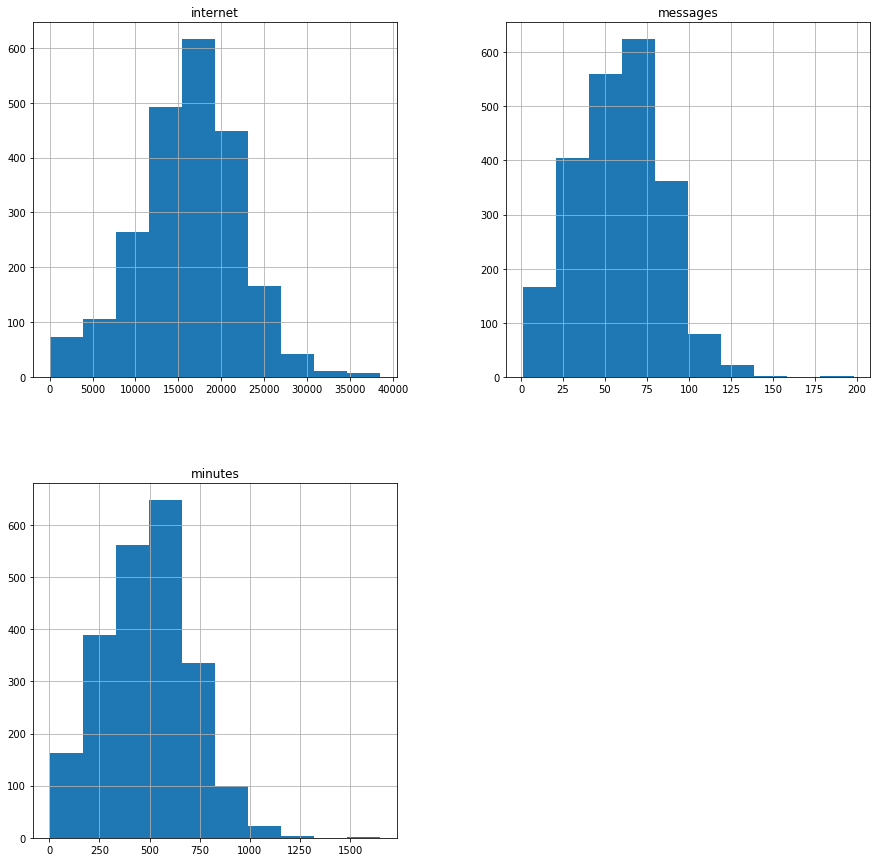

In [64]:
smart_tarif_total.hist(['minutes','messages','internet'], bins = 10, figsize = (15,15))


Все, что превышает показатели (smart_max) можно считать выбросами. Примерно половина клиентов тарифа выходят за лимит по минутам и интернет трафику, докупая их. Такая же история и с смс. Половина пользователей докупают пакеты смс. Больше всего и чаще всего докупают мобильный интернет причем верхних порог практически в 1,5 раза больше бесплатного лимита. На телефонные разговоры распределение скошено влево, т.е. склонность к перерасходу лимита присутсвует примерно у трети пользователей.

In [65]:
ultra_tarif_total.describe()

,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit
count,951.000000,951.000000,951.000000,951.0,951.0,951.000000,951.000000
mean,633.425868,76.016824,19461.977918,0.0,0.0,0.806519,2070.977918
std,354.607140,42.403348,10126.826020,0.0,0.0,2.529489,379.423372
min,1.000000,1.000000,0.000000,0.0,0.0,0.000000,1950.000000
25%,362.500000,43.000000,11623.000000,0.0,0.0,0.000000,1950.000000
50%,618.000000,75.000000,19352.000000,0.0,0.0,0.000000,1950.000000
75%,878.500000,105.000000,26833.500000,0.0,0.0,0.000000,1950.000000
max,1997.000000,244.000000,49745.000000,0.0,0.0,19.000000,4800.000000


Посчитаем дисперсии и стандартное отклонение

In [66]:
ultra_variance = np.var(ultra_tarif_total, ddof=1)
ultra_variance

minutes           1.257462e+05
messages          1.798044e+03
internet          1.025526e+08
total_minutes     0.000000e+00
total_messages    0.000000e+00
total_Gb          6.398315e+00
profit            1.439621e+05
dtype: float64

In [67]:
ultra_deviation = np.sqrt(ultra_variance)
ultra_deviation

minutes             354.607140
messages             42.403348
internet          10126.826020
total_minutes         0.000000
total_messages        0.000000
total_Gb              2.529489
profit              379.423372
dtype: float64

In [68]:
ultra_mean = ultra_tarif_total.mean()
ultra_mean

minutes             633.425868
messages             76.016824
internet          19461.977918
total_minutes         0.000000
total_messages        0.000000
total_Gb              0.806519
profit             2070.977918
dtype: float64

In [69]:
ultra_max = ultra_mean + ultra_deviation*3
ultra_max

minutes            1697.247287
messages            203.226869
internet          49842.455978
total_minutes         0.000000
total_messages        0.000000
total_Gb              8.394987
profit             3209.248034
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c5f95e990>,
      dtype=object)

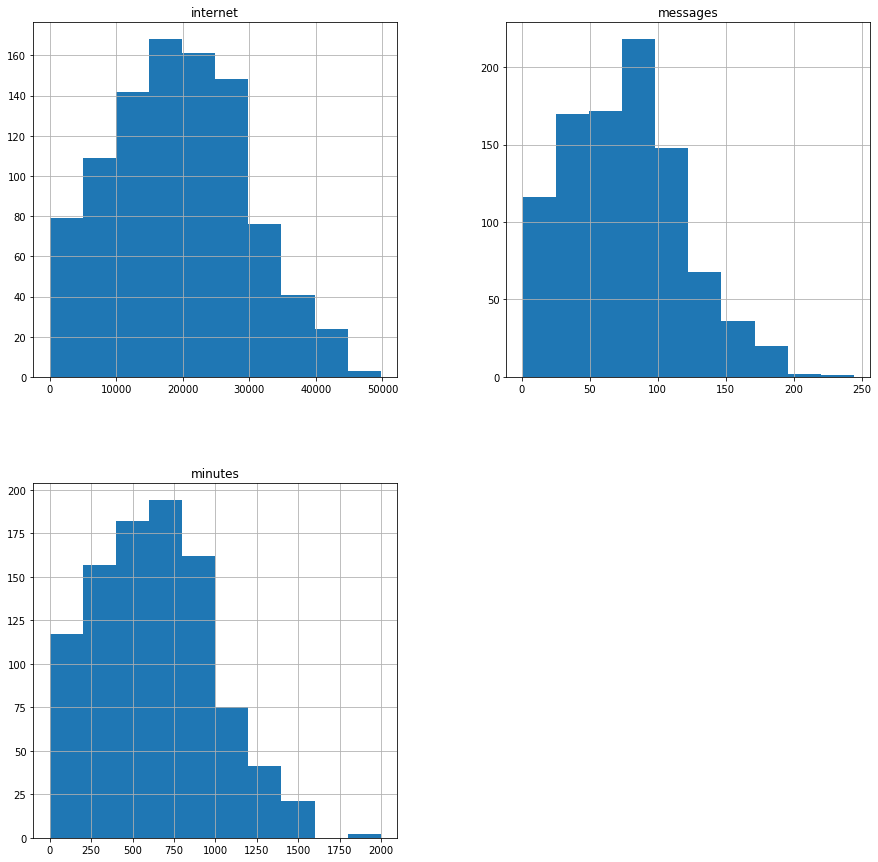

In [70]:
ultra_tarif_total.hist(['minutes','messages','internet'], bins = 10, figsize = (15,15))

По тарифу Ультра, показатели рахода минут и сообщений не превышают половины от включенных в тариф, по данным категориям получить дополнительные средства не выйдет. Интернет докупается, но незначительно.

### Вывод

Общий вывод по сравнению тарифных планов и поведения пользователей:

Пользователи тарифа Smart докупают минуты, интернет и смс. Пользователи тарифа Ultra докупают только интернет, но в незначительном количестве. Тариф Smart, несмотря на свои лидирующие позиции по дополнительным тратам на ресурсы, проигрывает по средней доходности тарифу Ultra. 

### Шаг 4. Проверка гипотез

Необходимо понять какую часть данных мы хотим удалить как выбросы.

In [71]:
print(len(smart_tarif_total.query('1140 < minutes')) / len(smart_tarif_total))
print(len(smart_tarif_total.query('136 < messages')) / len(smart_tarif_total))
print(len(smart_tarif_total.query('33837 < internet')) / len(smart_tarif_total))

0.002249212775528565
0.001799370220422852
0.003598740440845704


Количество выбросов в основной массе данных крайне мало (<1%), поэтому считаю что можно произвести удаление этих данных без особых опасений.

In [72]:
smart_tarif_total = smart_tarif_total.query('minutes < 1105 and messages < 136 and internet < 33837')[['minutes', 'messages', 'internet', 'total_minutes', 'total_messages', 'total_Gb', 'profit']]
smart_tarif_total

minutes  messages  internet  total_minutes  total_messages  \
user_id month                                                               
1001    11         514        59     18429             14               9   
        12         510        63     14036             10              13   
1002    6          123        15     10856              0               0   
        7          244        26     17580              0               0   
        8          319        42     20319              0               0   
...                ...       ...       ...            ...             ...   
1498    10         313        41     20579              0               0   
1499    9           76         9      1845              0               0   
        10         593        68     17788             93              18   
        11         684        74     17963            184              24   
        12         570        69     13055             70              19   

               total_Gb  profit  
user_id month                    
1001    11            3    1219  
        12            0     619  
1002    6             0     550  
        7             3    1150  
        8             5    1550  
...                 ...     ...  
1498    10            6    1750  
1499    9             0     550  
        10            3    1483  
        11            3    1774  
        12            0     817  

[2208 rows x 7 columns]

Сформировали "чистую" таблицу без выбросов для тарифа smart

Для таблицы ультра данные отсекать не будем. 

In [73]:
print(len(ultra_tarif_total.query('3000 < minutes')) / len(ultra_tarif_total))
print(len(ultra_tarif_total.query('1000 < messages')) / len(ultra_tarif_total))
print(len(ultra_tarif_total.query('49842 < internet')) / len(ultra_tarif_total))

0.0
0.0
0.0


Хоть мы и посчитали максимальные показатели для тарифа Ultra и мы знаем какими данными можно пренебречь, мы этого делать не будем. Причина в том, что тарифный план нам предоставляет 3000 минут и 1000 смс. а максимальные значения согласно распределению сильно меньше этих цифр. Если отсечем по ним данные, то сильно ошибемся в выручке по тарифу.Считаю что верхняя граница по минутам и смс должна быть 3000 и 1000. Что касается интернета, то мы проверили количество выбросов по максимальному значению, посчитанному ранее. Видим что значений превышающих это число в датасете нет. Делаем вывод, что по тарифу Ultra отсекать данные мы не будем.

#### Проверка гипотезы 1
    1) Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается; 

Проверяем гипотезу о равенстве средней выручки между тарифами, нам потребуется только столбец чистой выручки. За alpha возьмем пороговое значение — 5%.

  - *Нулевая гипотеза - средняя выручка между тарифными планами равна.*
  - *Альтернативная гипотеза - тарифы приносят разный среднедушевой доход при равном количестве абонентов.*

Формируем series из столбцов profit для двух тарифов

In [74]:
smart_profit = smart_tarif_total['profit'].sample(n=500, random_state=1)
smart_profit

user_id  month
1408     12       1138
1357     11       1953
1268     12        768
1088     10       1953
1043     10       2489
                  ... 
1286     11        550
1435     10       1350
1177     7         894
1092     6         550
1114     7         550
Name: profit, Length: 500, dtype: int64

In [75]:
ultra_profit = ultra_tarif_total['profit'].sample(n=500, random_state=1)
ultra_profit

user_id  month
1148     10       2250
1440     9        1950
1255     3        2100
1385     4        1950
1325     6        1950
                  ... 
1257     12       1950
1377     8        1950
1396     12       1950
1343     8        1950
1336     12       1950
Name: profit, Length: 500, dtype: int64

In [76]:
alpha = .05

smart_profit
ultra_profit

results = st.ttest_ind(
    smart_profit, 
    ultra_profit)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.038334329003393e-49
Отвергаем нулевую гипотезу


In [77]:
print('cреднее по smart: ',smart_profit.mean())
print('cреднее по ultra: ',ultra_profit.mean())

cреднее по smart:  1425.164
cреднее по ultra:  2065.8


Отвергаем нулевую гипотезу. Средняя выручка по тарифам сильно отличается. 

Проверим наши показатели через доверительный интервал. Выведем интервалы для smart_profit и ultra_profit и посмотрим, имеются ли пересечения между показателями.

In [78]:
sms.DescrStatsW(smart_profit).tconfint_mean() 

(1350.7685999675157, 1499.5594000324843)

In [79]:
sms.DescrStatsW(ultra_profit).tconfint_mean()

(2033.9941410392914, 2097.605858960709)

Между доверительными интервалами нет пересечений, а значит мы сделали верный вывод.

   #### Проверка гипотезы 2
    2) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

  - *Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.*
  - *Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.*

Создадим таблицу с номером пользователя и городом проживания. Эта таблица понадобится нам в дальнейшем для разделения пользователей по месту проживания

In [80]:
users_city = df_users[['user_id','city']]
users_city

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк
...,...,...
495,1495,Иркутск
496,1496,Вологда
497,1497,Челябинск
498,1498,Владикавказ


In [81]:
smart_tarif_total.reset_index()

,user_id,month,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit
0,1001,11,514,59,18429,14,9,3,1219
1,1001,12,510,63,14036,10,13,0,619
2,1002,6,123,15,10856,0,0,0,550
3,1002,7,244,26,17580,0,0,3,1150
4,1002,8,319,42,20319,0,0,5,1550
...,...,...,...,...,...,...,...,...,...
2203,1498,10,313,41,20579,0,0,6,1750
2204,1499,9,76,9,1845,0,0,0,550
2205,1499,10,593,68,17788,93,18,3,1483
2206,1499,11,684,74,17963,184,24,3,1774


In [82]:
ultra_tarif_total.reset_index()

,user_id,month,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit
0,1000,5,189,22,2253,0,0,0,1950
1,1000,6,262,43,23233,0,0,0,1950
2,1000,7,376,47,14003,0,0,0,1950
3,1000,8,468,52,14055,0,0,0,1950
4,1000,9,538,58,14568,0,0,0,1950
...,...,...,...,...,...,...,...,...,...
946,1495,8,116,17,2614,0,0,0,1950
947,1495,9,915,112,33067,0,0,3,2400
948,1495,10,1186,152,29363,0,0,0,1950
949,1495,11,1056,129,38939,0,0,9,3300


Объединим таблицы smart_users_city и ultra_users_city с только что созданной таблицей users_city. 

In [83]:
smart_users_city = smart_tarif_total.merge(users_city, on='user_id')
smart_users_city

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
0,1001,514,59,18429,14,9,3,1219,Москва
1,1001,510,63,14036,10,13,0,619,Москва
2,1002,123,15,10856,0,0,0,550,Стерлитамак
3,1002,244,26,17580,0,0,3,1150,Стерлитамак
4,1002,319,42,20319,0,0,5,1550,Стерлитамак
...,...,...,...,...,...,...,...,...,...
2203,1498,313,41,20579,0,0,6,1750,Владикавказ
2204,1499,76,9,1845,0,0,0,550,Пермь
2205,1499,593,68,17788,93,18,3,1483,Пермь
2206,1499,684,74,17963,184,24,3,1774,Пермь


In [84]:
ultra_users_city = ultra_tarif_total.merge(users_city, on='user_id')
ultra_users_city

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
0,1000,189,22,2253,0,0,0,1950,Краснодар
1,1000,262,43,23233,0,0,0,1950,Краснодар
2,1000,376,47,14003,0,0,0,1950,Краснодар
3,1000,468,52,14055,0,0,0,1950,Краснодар
4,1000,538,58,14568,0,0,0,1950,Краснодар
...,...,...,...,...,...,...,...,...,...
946,1495,116,17,2614,0,0,0,1950,Иркутск
947,1495,915,112,33067,0,0,3,2400,Иркутск
948,1495,1186,152,29363,0,0,0,1950,Иркутск
949,1495,1056,129,38939,0,0,9,3300,Иркутск


In [85]:
smart_msc = smart_users_city[smart_users_city.city != 'Москва']
smart_msc

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
2,1002,123,15,10856,0,0,0,550,Стерлитамак
3,1002,244,26,17580,0,0,3,1150,Стерлитамак
4,1002,319,42,20319,0,0,5,1550,Стерлитамак
5,1002,272,36,16691,0,0,2,950,Стерлитамак
6,1002,266,33,13888,0,0,0,550,Стерлитамак
...,...,...,...,...,...,...,...,...,...
2203,1498,313,41,20579,0,0,6,1750,Владикавказ
2204,1499,76,9,1845,0,0,0,550,Пермь
2205,1499,593,68,17788,93,18,3,1483,Пермь
2206,1499,684,74,17963,184,24,3,1774,Пермь


Разделим каждую из таблиц (smart_users_city и ultra_users_city) на таблицы по городу проживания. Нам нужно получить :
    - smart_msc - тариф смарт для проживающих в Москве
    - smart_rf - тариф смарт для проживающих за пределами Москвы
    - ultra_msc - тариф ультра для проживающих в Москве
    - ultra_rf - тариф ультра для проживающих за пределами Москвы

In [86]:
smart_msc = smart_users_city.query('city == "Москва"')
smart_msc

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
0,1001,514,59,18429,14,9,3,1219,Москва
1,1001,510,63,14036,10,13,0,619,Москва
32,1007,222,25,8022,0,0,0,550,Москва
33,1007,540,67,17687,40,17,3,1321,Москва
34,1007,623,68,13654,123,18,0,973,Москва
...,...,...,...,...,...,...,...,...,...
2168,1490,376,45,17275,0,0,2,950,Москва
2169,1490,400,44,14816,0,0,0,550,Москва
2170,1490,360,42,20664,0,0,6,1750,Москва
2171,1490,324,38,18712,0,0,4,1350,Москва


In [87]:
smart_rf = smart_users_city.query('city != "Москва"')
smart_rf

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
2,1002,123,15,10856,0,0,0,550,Стерлитамак
3,1002,244,26,17580,0,0,3,1150,Стерлитамак
4,1002,319,42,20319,0,0,5,1550,Стерлитамак
5,1002,272,36,16691,0,0,2,950,Стерлитамак
6,1002,266,33,13888,0,0,0,550,Стерлитамак
...,...,...,...,...,...,...,...,...,...
2203,1498,313,41,20579,0,0,6,1750,Владикавказ
2204,1499,76,9,1845,0,0,0,550,Пермь
2205,1499,593,68,17788,93,18,3,1483,Пермь
2206,1499,684,74,17963,184,24,3,1774,Пермь


In [88]:
ultra_msc = ultra_users_city.query('city == "Москва"')
ultra_msc

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
8,1003,452,55,8565,0,0,0,1950,Москва
9,1003,1135,134,12468,0,0,0,1950,Москва
10,1003,921,108,14768,0,0,0,1950,Москва
11,1003,944,115,11356,0,0,0,1950,Москва
12,1003,922,108,10121,0,0,0,1950,Москва
...,...,...,...,...,...,...,...,...,...
929,1476,510,59,25106,0,0,0,1950,Москва
930,1476,700,72,18602,0,0,0,1950,Москва
931,1476,588,68,25125,0,0,0,1950,Москва
932,1476,628,71,14410,0,0,0,1950,Москва


In [89]:
ultra_rf = ultra_users_city.query('city != "Москва"')
ultra_rf

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
0,1000,189,22,2253,0,0,0,1950,Краснодар
1,1000,262,43,23233,0,0,0,1950,Краснодар
2,1000,376,47,14003,0,0,0,1950,Краснодар
3,1000,468,52,14055,0,0,0,1950,Краснодар
4,1000,538,58,14568,0,0,0,1950,Краснодар
...,...,...,...,...,...,...,...,...,...
946,1495,116,17,2614,0,0,0,1950,Иркутск
947,1495,915,112,33067,0,0,3,2400,Иркутск
948,1495,1186,152,29363,0,0,0,1950,Иркутск
949,1495,1056,129,38939,0,0,9,3300,Иркутск


In [90]:
smart_profit_msc = smart_msc['profit'].sample(n=200, random_state=1)
smart_profit_rf = smart_rf['profit'].sample(n=200, random_state=1)

In [91]:
alpha = .05

results = st.ttest_ind(
    smart_profit_msc, 
    smart_profit_rf)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3604291890578435
Не получилось отвергнуть нулевую гипотезу


Проверим наши показатели через доверительный интервал. Выведем интервалы для smart_profit_msc и smart_profit_rf и посмотрим, имеются ли пересечения между показателями.

In [92]:
sms.DescrStatsW(smart_profit_msc).tconfint_mean() 

(1229.7316695360566, 1450.6283304639435)

In [93]:
sms.DescrStatsW(smart_profit_rf).tconfint_mean() 

(1294.2226758655097, 1539.3473241344905)

Показатели доверительных интервалов имеют пересечение, а значит средние показатели доходности с одного пользователя примерно одинаковы вне зависимости от места жительства абонента тарифа "Смарт"

Проверяем аналогично для тарифа "Ультра"

In [94]:
ultra_profit_msc = ultra_msc['profit'].sample(n=200, random_state=1)
ultra_profit_rf = ultra_rf['profit'].sample(n=200, random_state=1)

In [95]:
alpha = .05

results = st.ttest_ind(
    ultra_profit_msc, 
    ultra_profit_rf)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2585254433136184
Не получилось отвергнуть нулевую гипотезу


Проверим наши показатели через доверительный интервал. Выведем интервалы для ultra_profit_msc и ultra_profit_rf и посмотрим, имеются ли пересечения между показателями.

In [96]:
sms.DescrStatsW(ultra_profit_msc).tconfint_mean() 

(2035.940852678727, 2138.559147321273)

In [97]:
sms.DescrStatsW(ultra_profit_rf).tconfint_mean() 

(2000.9547489011086, 2094.045251098891)

Показатели доверительных интервалов имеют пересечение, а значит средние показатели доходности с одного пользователя примерно одинаковы вне зависимости от места жительства абонента тарифа "Ультра"

Проверим гипотезу не разделяя таблицу по тарифам. Объединим имеющиеся у нас таблицы для Москвы (smart_msc и ultra_msc) и для регионов (smart_rf и ultra_rf) в две таблицы (msc и rf).

In [98]:
msc = smart_msc.merge(ultra_msc, how='outer')
msc

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
0,1001,514,59,18429,14,9,3,1219,Москва
1,1001,510,63,14036,10,13,0,619,Москва
2,1007,222,25,8022,0,0,0,550,Москва
3,1007,540,67,17687,40,17,3,1321,Москва
4,1007,623,68,13654,123,18,0,973,Москва
...,...,...,...,...,...,...,...,...,...
603,1476,510,59,25106,0,0,0,1950,Москва
604,1476,700,72,18602,0,0,0,1950,Москва
605,1476,588,68,25125,0,0,0,1950,Москва
606,1476,628,71,14410,0,0,0,1950,Москва


In [99]:
rf = smart_rf.merge(ultra_rf, how='outer')
rf

,user_id,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit,city
0,1002,123,15,10856,0,0,0,550,Стерлитамак
1,1002,244,26,17580,0,0,3,1150,Стерлитамак
2,1002,319,42,20319,0,0,5,1550,Стерлитамак
3,1002,272,36,16691,0,0,2,950,Стерлитамак
4,1002,266,33,13888,0,0,0,550,Стерлитамак
...,...,...,...,...,...,...,...,...,...
2546,1495,116,17,2614,0,0,0,1950,Иркутск
2547,1495,915,112,33067,0,0,3,2400,Иркутск
2548,1495,1186,152,29363,0,0,0,1950,Иркутск
2549,1495,1056,129,38939,0,0,9,3300,Иркутск


In [100]:
msc['profit'].mean()

1622.4588815789473

In [101]:
rf['profit'].mean()

1609.297138377107

In [102]:
profit_msc = msc['profit'].sample(n=400, random_state=1)
profit_rf = rf['profit'].sample(n=400, random_state=1)

In [103]:
alpha = .05

results = st.ttest_ind(
    profit_msc, 
    profit_rf)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16395998956755442
Не получилось отвергнуть нулевую гипотезу


Проверим наши показатели через доверительный интервал. Выведем интервалы для profit_msc и profit_rf и посмотрим, имеются ли пересечения между показателями.

In [104]:
sms.DescrStatsW(profit_msc).tconfint_mean() 

(1516.6802964785204, 1659.4297035214797)

In [105]:
sms.DescrStatsW(profit_rf).tconfint_mean() 

(1441.6133026380523, 1589.0616973619478)

Показатели доверительных интервалов имеют пересечение, а значит средние показатели доходности с одного пользователя примерно одинаковы вне зависимости от места жительства абонента.

Посчитаем общую доходность тарифов:

In [106]:
msc_total_profit = smart_msc['profit'].sum() + ultra_msc['profit'].sum()
rf_total_profit = smart_rf['profit'].sum() + ultra_rf['profit'].sum()
tariffs_sum = msc_total_profit + rf_total_profit
msc_percent = msc_total_profit / tariffs_sum
rf_percent = rf_total_profit / tariffs_sum

In [107]:
print ('Суммарный доход от двух тарифов в Москве:', msc_total_profit)
print ('Суммарный доход от двух тарифов по России (исключая Москву):', rf_total_profit)
print ('Суммарный доход от двух тарифов по России (в т.ч. Москва):', tariffs_sum)

print ('Пользоватeли тарифов по России суммарно принесли за 2018 год: {:.1%}'.format(rf_percent))
print ('Пользоватeли тарифов по Москве суммарно принесли за 2018 год: {:.1%}'.format(msc_percent))

Суммарный доход от двух тарифов в Москве: 986455
Суммарный доход от двух тарифов по России (исключая Москву): 4105317
Суммарный доход от двух тарифов по России (в т.ч. Москва): 5091772
Пользоватeли тарифов по России суммарно принесли за 2018 год: 80.6%
Пользоватeли тарифов по Москве суммарно принесли за 2018 год: 19.4%


### Шаг 5. Общий вывод

In [108]:
smart_tarif_total.describe()

,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit
count,2208.000000,2208.000000,2208.00000,2208.000000,2208.000000,2208.000000,2208.000000
mean,484.807971,58.206975,16119.46558,78.652174,15.018116,2.915308,1414.072464
std,212.719853,25.249677,5756.98601,116.489170,17.072983,3.520743,851.705158
min,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,550.000000
25%,331.500000,40.000000,12616.50000,0.000000,0.000000,0.000000,589.000000
50%,493.000000,60.000000,16459.50000,0.000000,10.000000,2.000000,1196.000000
75%,632.000000,76.000000,20005.25000,132.000000,26.000000,5.000000,1950.000000
max,1096.000000,127.000000,32740.00000,596.000000,77.000000,17.000000,5495.000000


In [109]:
ultra_tarif_total.describe()

,minutes,messages,internet,total_minutes,total_messages,total_Gb,profit
count,951.000000,951.000000,951.000000,951.0,951.0,951.000000,951.000000
mean,633.425868,76.016824,19461.977918,0.0,0.0,0.806519,2070.977918
std,354.607140,42.403348,10126.826020,0.0,0.0,2.529489,379.423372
min,1.000000,1.000000,0.000000,0.0,0.0,0.000000,1950.000000
25%,362.500000,43.000000,11623.000000,0.0,0.0,0.000000,1950.000000
50%,618.000000,75.000000,19352.000000,0.0,0.0,0.000000,1950.000000
75%,878.500000,105.000000,26833.500000,0.0,0.0,0.000000,1950.000000
max,1997.000000,244.000000,49745.000000,0.0,0.0,19.000000,4800.000000


Несмотря на все дополнительные источники дохода с пользователей тарифа Смарт, суммарно они не могут превзойти абонентскую плату от тарифа Ультра. Пользователи Смарта активнее спонсируют компанию Мегалайн, докупая минуты и гигабайты, но средний суммарный чек от их манипуляций меньше при равных показателях (равной выборке) по пользователям на 40%. Рекомендуется провести рекламную акцию по привлечению дополнительных клиентов на тарифный план 'Смарт', или же скорректировать условия тарифа.

Среднее для тарифа смарт:

In [110]:
print('Среднее по Москве:', smart_msc['profit'].mean()) 
print('Среднее по РФ:', smart_rf['profit'].mean()) 

Среднее по Москве: 1358.7369791666667
Среднее по РФ: 1425.7220394736842


Среднее для тарифа Ультра:

In [111]:
print('Среднее по Москве:', ultra_msc['profit'].mean()) 
print('Среднее по РФ:', ultra_rf['profit'].mean()) 

Среднее по Москве: 2074.5535714285716
Среднее по РФ: 2069.876203576341


Как видим, пользователи в среднем тратят одинаковое количество денег на оба тарифа вне зависимости от места проживвания